# Análisis #1: Invirtiendo Juntos BBVA

Puntos a considerar en este análisis de datos para estudiar el comportamiento del cliente al invertir
Obtener la probabilidad de que un cliente sea Inversor y No inversor
Con una muestra de 30,000 clientes

Variable de Salida: 

default.invesment.next.month = Probabilidad del cliente de ser inversor (1 = SI, 0 = NO)

Variables de entrada:

ID	
SALARY_AMT
SEX
EDUCATION
MARRIAGE
AGE
INVEST_0
INVEST_2
INVEST_3
INVEST_4
INVEST_5
INVEST_6
NO_INVEST_AMT1
NO_INVEST_AMT2
NO_INVEST_AMT3
NO_INVEST_AMT4
NO_INVEST_AMT5
NO_INVEST_AMT6
INVEST_AMT1
INVEST_AMT2
INVEST_AMT3
INVEST_AMT4
INVEST_AMT5
INVEST_AMT6


Cualquier publicación basada en este dataset debe referenciarse como sigue:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

El dataset original puede encontrarse en el repositorio del UCI Machine Learning Repository.



# # IMPORTAR LIBRERÍAS Y DATASETs

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Necesitaremos montar su disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, puedes consultar: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

#from google.colab import drive
#drive.mount('/content/drive')

In [124]:
# Tienes que incluir el enlace completo al archivo csv que contiene el conjunto de datos
investpeople_df = pd.read_csv('UCI_invest_People.csv')

In [125]:
investpeople_df

,ID,SALARY_AMT,SEX,EDUCATION,MARRIAGE,AGE,INVEST_0,INVEST_2,INVEST_3,INVEST_4,...,NO_INVEST_AMT4,NO_INVEST_AMT5,NO_INVEST_AMT6,INVEST_AMT1,INVEST_AMT2,INVEST_AMT3,INVEST_AMT4,INVEST_AMT5,INVEST_AMT6,default.invesment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [126]:
investpeople_df.describe()
# la media de SALARY_AMT = 1500, min = 1 y max = 30000
# la media de EDAD = 25 años, mínimo = 21 y máximo = 79
# El promedio de INVEST_AMT es alrededor de 5000

,ID,SALARY_AMT,SEX,EDUCATION,MARRIAGE,AGE,INVEST_0,INVEST_2,INVEST_3,INVEST_4,...,NO_INVEST_AMT4,NO_INVEST_AMT5,NO_INVEST_AMT6,INVEST_AMT1,INVEST_AMT2,INVEST_AMT3,INVEST_AMT4,INVEST_AMT5,INVEST_AMT6,default.invesment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# # VISUALIZAR EL DATASET

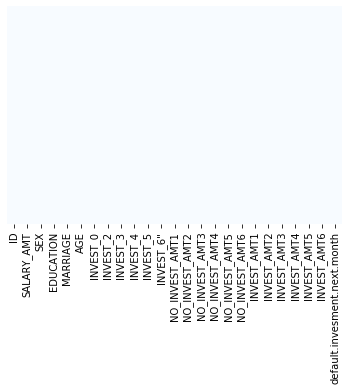

In [35]:
# Veamos si nos faltan datos, ¡afortunadamente NO!
sns.heatmap(investpeople_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44b7fda350>,
      dtype=object)

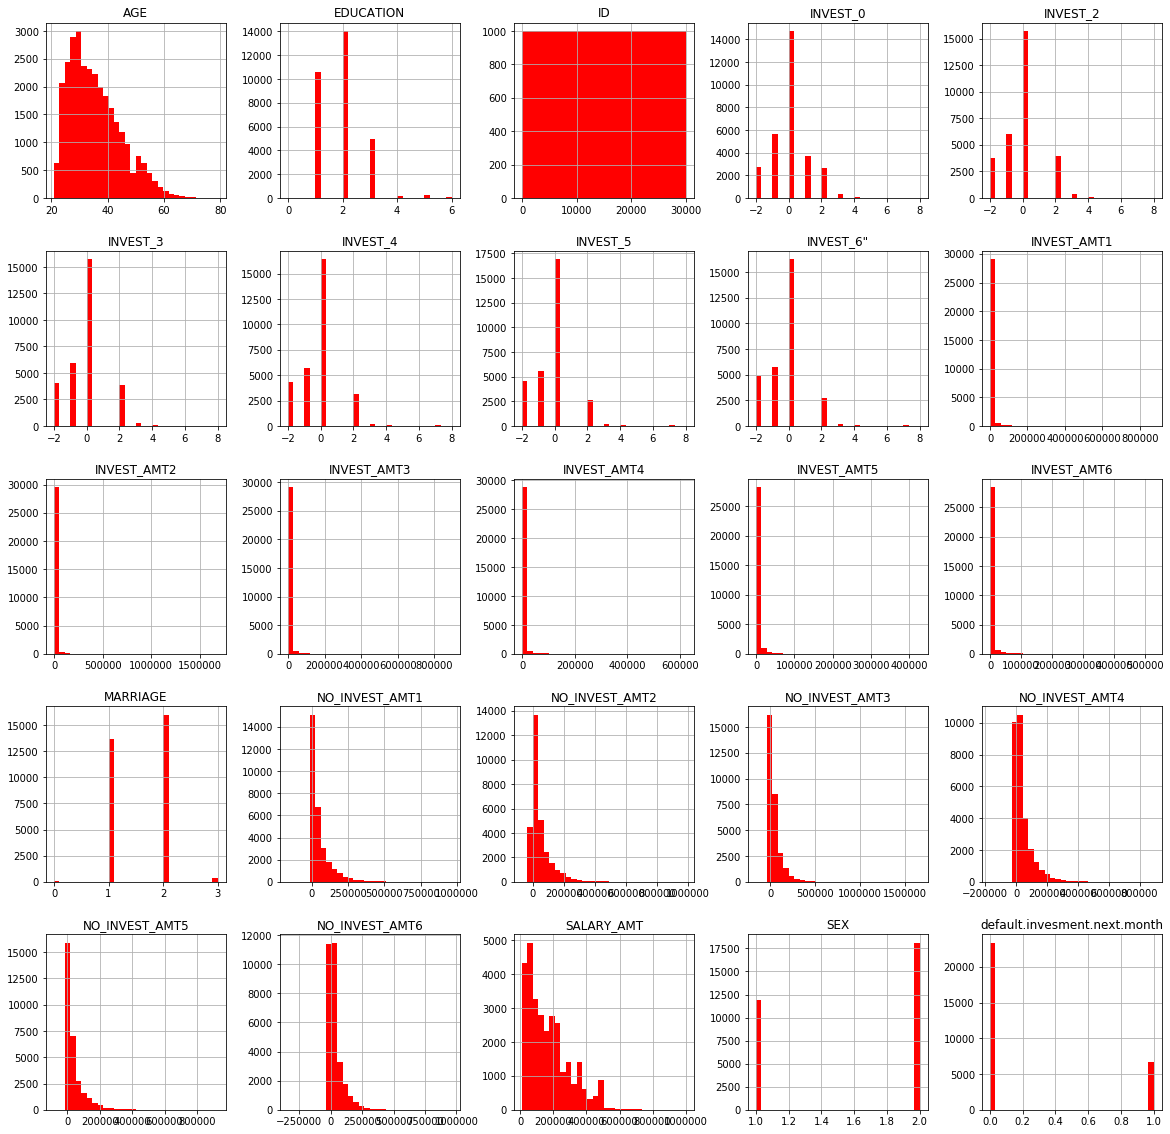

In [42]:
#Exploracion de cada una de las variables
investpeople_df.hist(bins = 30, figsize = (20,20), color = 'r')


In [43]:
# Vamos a eliminar la columna con el ID
investpeople_df.drop(['ID'], axis=1, inplace=True)

In [48]:
investpeople_df

,SALARY_AMT,SEX,EDUCATION,MARRIAGE,AGE,INVEST_0,INVEST_2,INVEST_3,INVEST_4,INVEST_5,...,NO_INVEST_AMT4,NO_INVEST_AMT5,NO_INVEST_AMT6,INVEST_AMT1,INVEST_AMT2,INVEST_AMT3,INVEST_AMT4,INVEST_AMT5,INVEST_AMT6,default.invesment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [50]:
# ¡Veamos cuántos clientes podrían incumplir con el pago con tarjeta de crédito!
cc_default_df        = investpeople_df[investpeople_df['default.invesment.next.month'] == 1]
cc_nodefault_df      = investpeople_df[investpeople_df['default.invesment.next.month'] == 0]


In [65]:
# Contamos el número de clientes de la muestra
# Parece que estamos ante un conjunto de datos desbalanceado

print("Total =", len(investpeople_df))

print("Número de clientes que invierten =", len(cc_default_df))
print("Porcentaje de clientes que invierten =", 1.*len(cc_default_df)/len(investpeople_df)*100.0, "%")
 
print("Número de clientes que no invierten =", len(cc_nodefault_df))
print("Porcentaje de clientes no invierten =", 1.*len(cc_nodefault_df)/len(investpeople_df)*100.0, "%")

Total = 30000
Número de clientes que invierten = 6636
Porcentaje de clientes que invierten = 22.12 %
Número de clientes que no invierten = 23364
Porcentaje de clientes no invierten = 77.88000000000001 %


In [66]:
# Comparemos la media y el error estándar de los clientes que invierten y los que no
cc_default_df.describe()

,SALARY_AMT,SEX,EDUCATION,MARRIAGE,AGE,INVEST_0,INVEST_2,INVEST_3,INVEST_4,INVEST_5,...,NO_INVEST_AMT4,NO_INVEST_AMT5,NO_INVEST_AMT6,INVEST_AMT1,INVEST_AMT2,INVEST_AMT3,INVEST_AMT4,INVEST_AMT5,INVEST_AMT6,default.invesment.next.month
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,1.482833,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [67]:
# Comparemos la media y el error estándar de los clientes que invierten y los que no
cc_nodefault_df.describe()

,SALARY_AMT,SEX,EDUCATION,MARRIAGE,AGE,INVEST_0,INVEST_2,INVEST_3,INVEST_4,INVEST_5,...,NO_INVEST_AMT4,NO_INVEST_AMT5,NO_INVEST_AMT6,INVEST_AMT1,INVEST_AMT2,INVEST_AMT3,INVEST_AMT4,INVEST_AMT5,INVEST_AMT6,default.invesment.next.month
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,23364.0
mean,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769,0.0
std,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,0.977591,...,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473,0.0
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000,0.0
50%,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000,0.0
75%,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


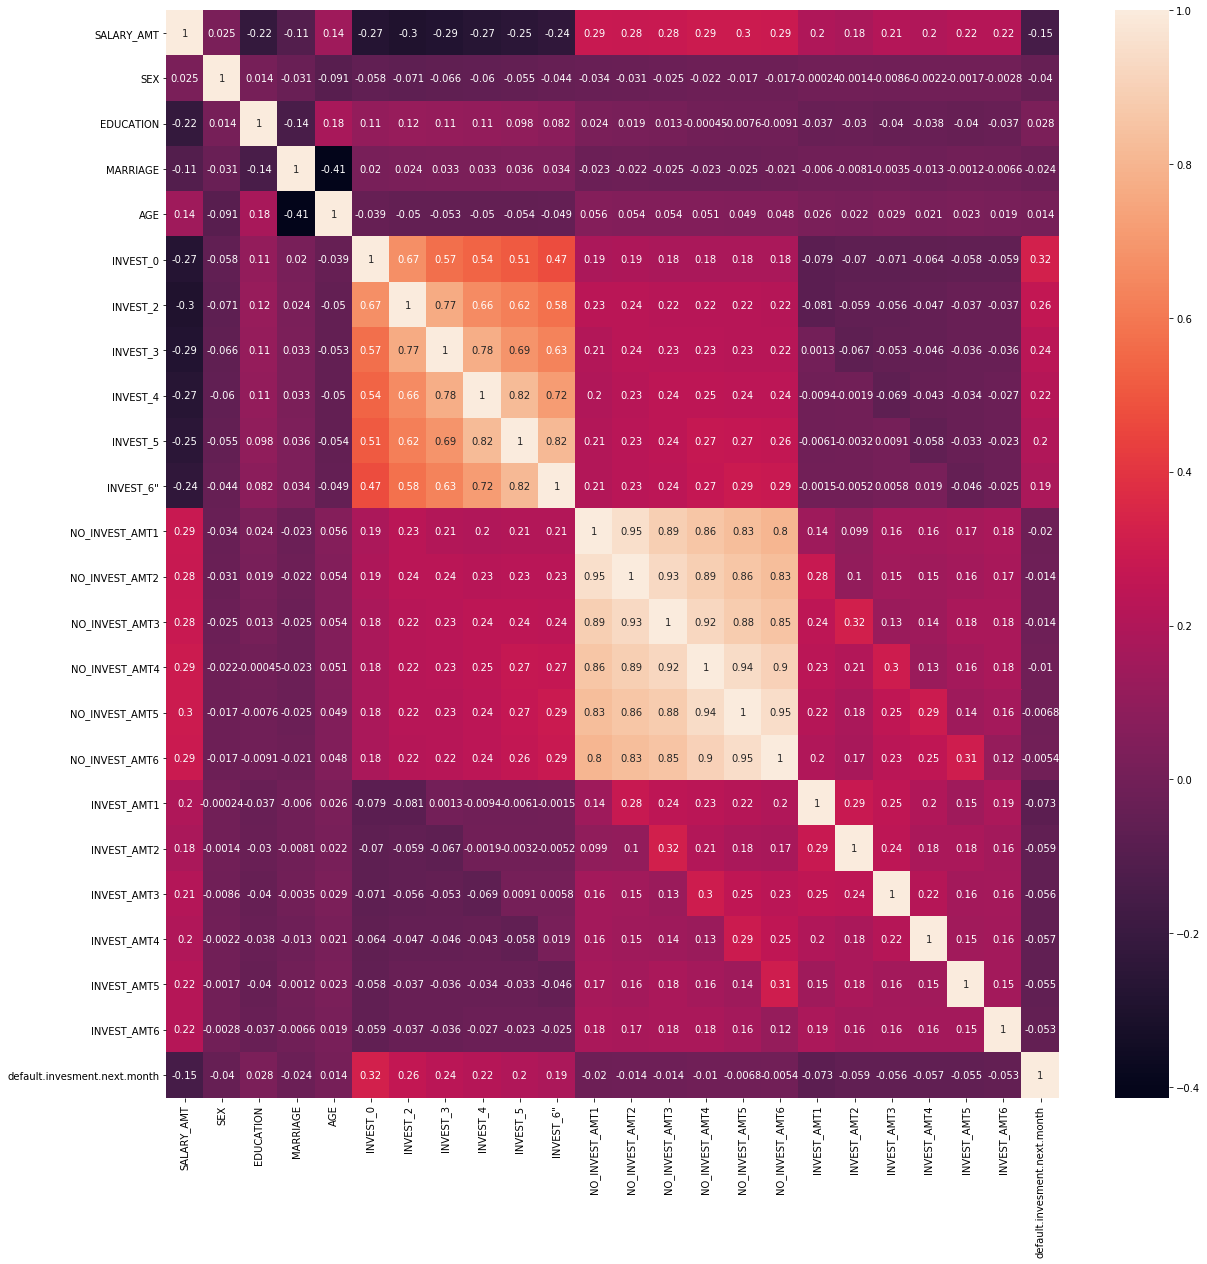

In [68]:
correlations = investpeople_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)


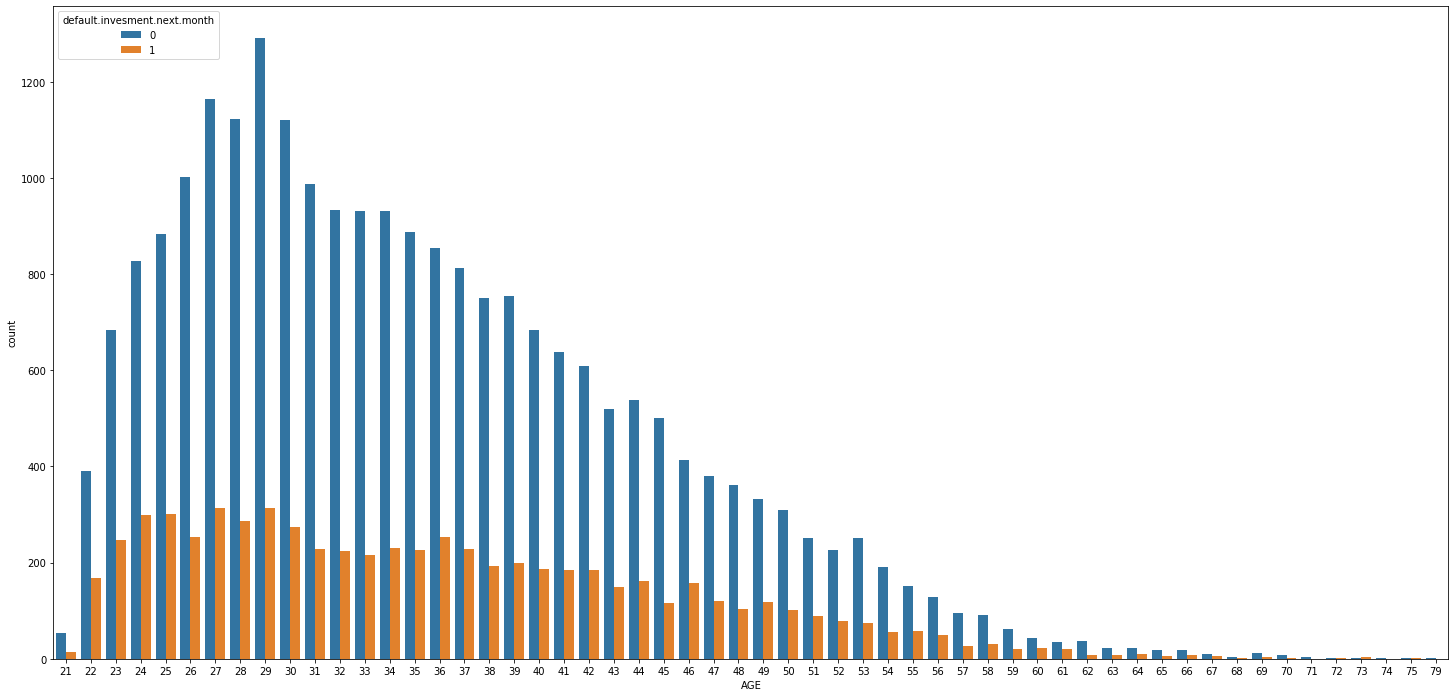

In [69]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'AGE', hue = 'default.invesment.next.month', data = investpeople_df)

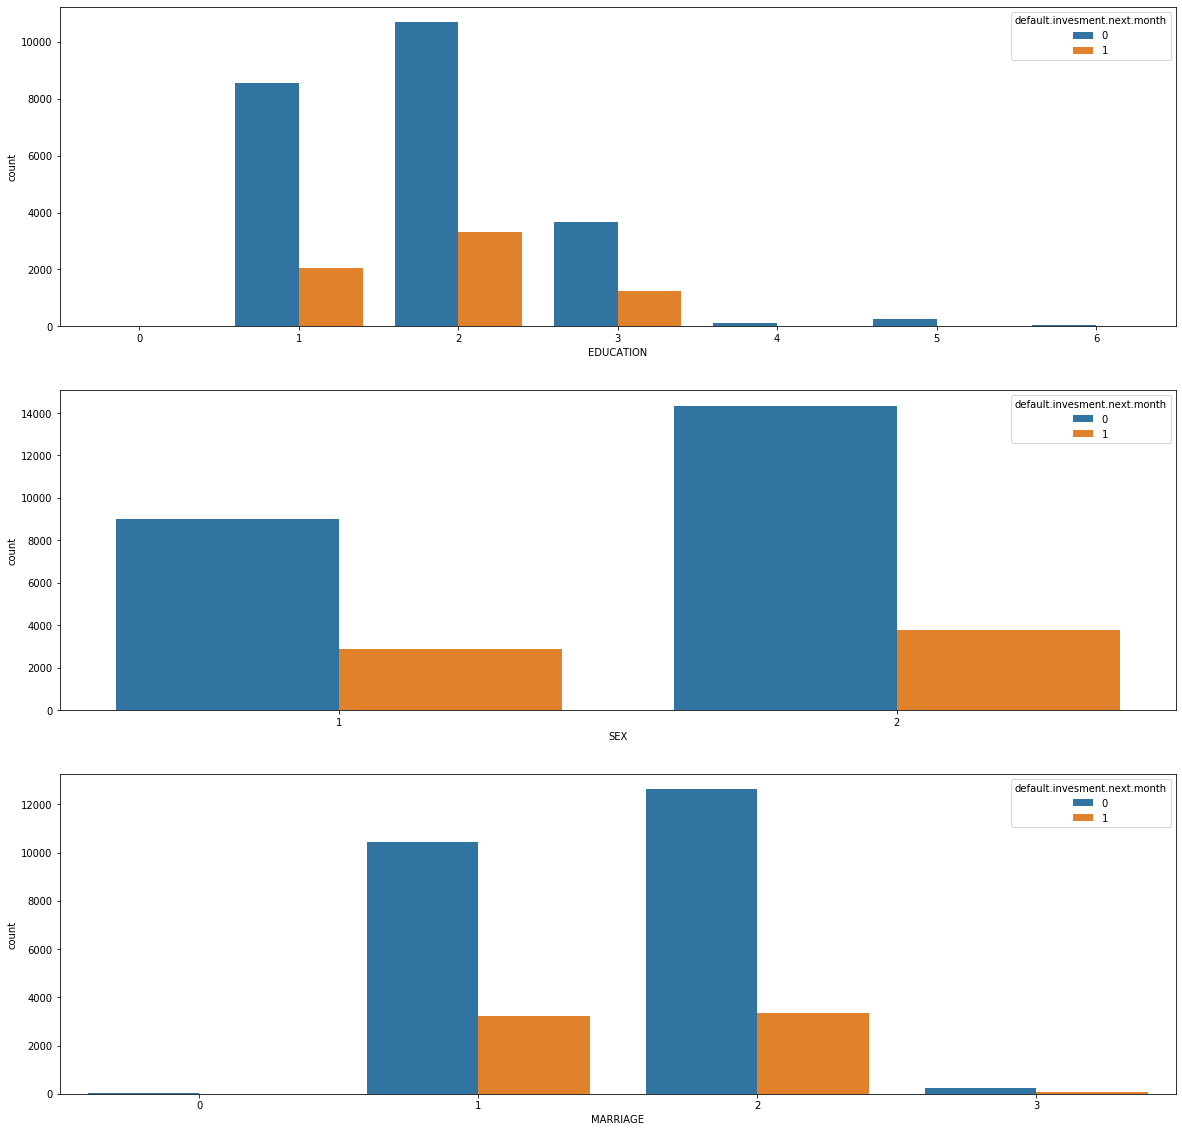

In [70]:
plt.figure(figsize=[20,20])
plt.subplot(311)
sns.countplot(x = 'EDUCATION', hue = 'default.invesment.next.month', data = investpeople_df)
plt.subplot(312)
sns.countplot(x = 'SEX', hue = 'default.invesment.next.month', data = investpeople_df)
plt.subplot(313)
sns.countplot(x = 'MARRIAGE', hue = 'default.invesment.next.month', data = investpeople_df)


Text(0.5, 0, 'Cantidad que debe en cuenta a septiembre de 2015 (Pesos MX)')

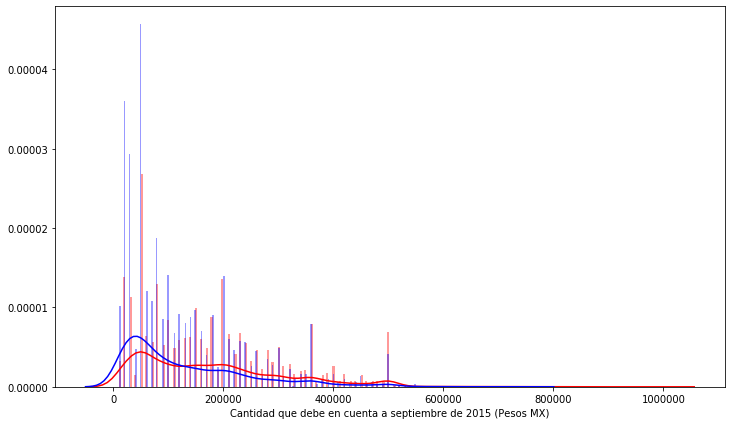

In [221]:
# KDE (Kernel Density Estimate) se utiliza para visualizar la densidad de probabilidad de una variable continua.
# KDE describe la densidad de probabilidad a diferentes valores en una variable continua.

plt.figure(figsize=(12,7))

sns.distplot(cc_nodefault_df['SALARY_AMT'], bins = 250, color = 'r')
sns.distplot(cc_default_df['SALARY_AMT'], bins = 250, color = 'b')

plt.xlabel('Cantidad que debe en cuenta a septiembre de 2015 (Pesos MX)')
#plt.xlim(0, 200000)


Text(0.5, 0, 'Cantidad que no invierte en cuenta a septiembre de 2018 (dólar)')

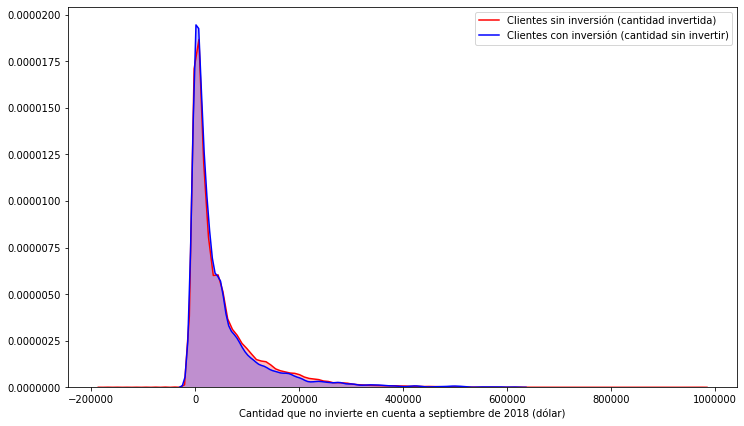

In [80]:
# KDE (Kernel Density Estimate) se utiliza para visualizar la densidad de probabilidad de una variable continua.
# KDE describe la densidad de probabilidad a diferentes valores en una variable continua.

plt.figure(figsize=(12,7))

sns.kdeplot(cc_nodefault_df['NO_INVEST_AMT1'], label = 'Clientes sin inversión (cantidad invertida)', shade = True, color = 'r')
sns.kdeplot(cc_default_df['NO_INVEST_AMT1'], label = 'Clientes con inversión (cantidad sin invertir)', shade = True, color = 'b')

plt.xlabel('Cantidad que no invierte en cuenta a septiembre de 2018 (dólar)')
#plt.xlim(0, 200000)


(0, 200000)

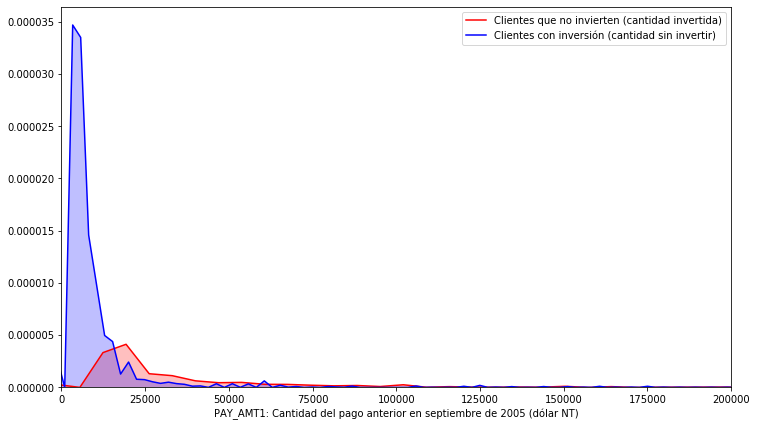

In [78]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 

plt.figure(figsize=(12,7))

sns.kdeplot(cc_nodefault_df['INVEST_AMT1'], label = 'Clientes sin inversión (cantidad invertida)', shade = True, color = 'r')
sns.kdeplot(cc_default_df['INVEST_AMT1'], label = 'Clientes con inversión (cantidad sin invertir)', shade = True, color = 'b')

plt.xlabel('PAY_AMT1: Cantidad del pago anterior en septiembre de 2005 (dólar NT)')
plt.xlim(0, 200000)


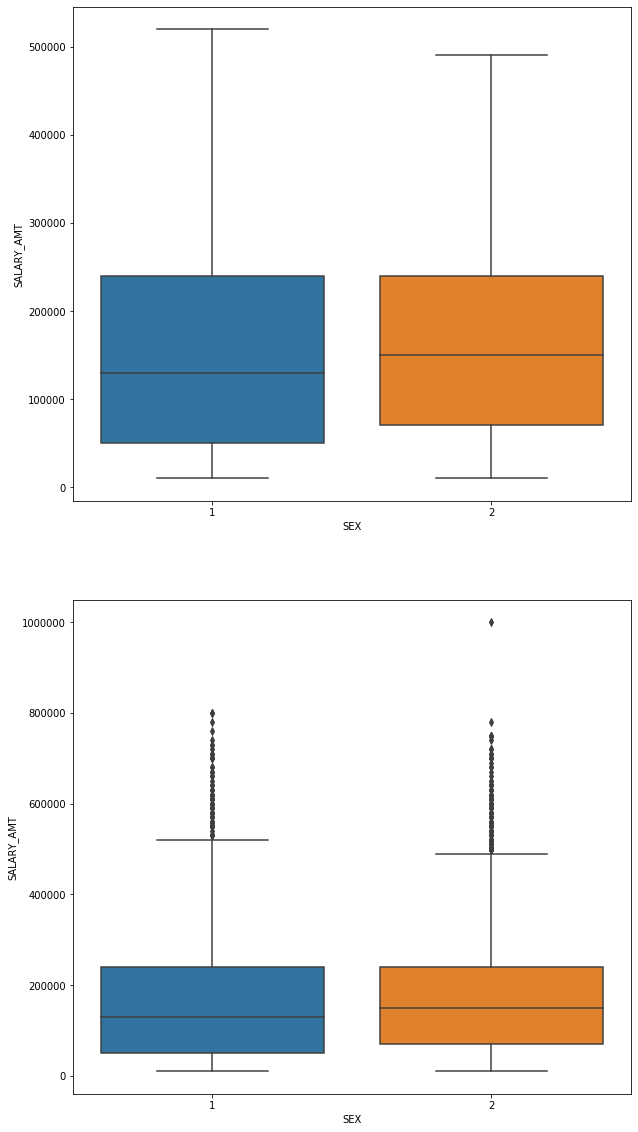

In [82]:
# Veamos si el género del individuo tiene efecto en el límite del balance

plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'SEX', y = 'SALARY_AMT', data = investpeople_df, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'SEX', y = 'SALARY_AMT', data = investpeople_df)


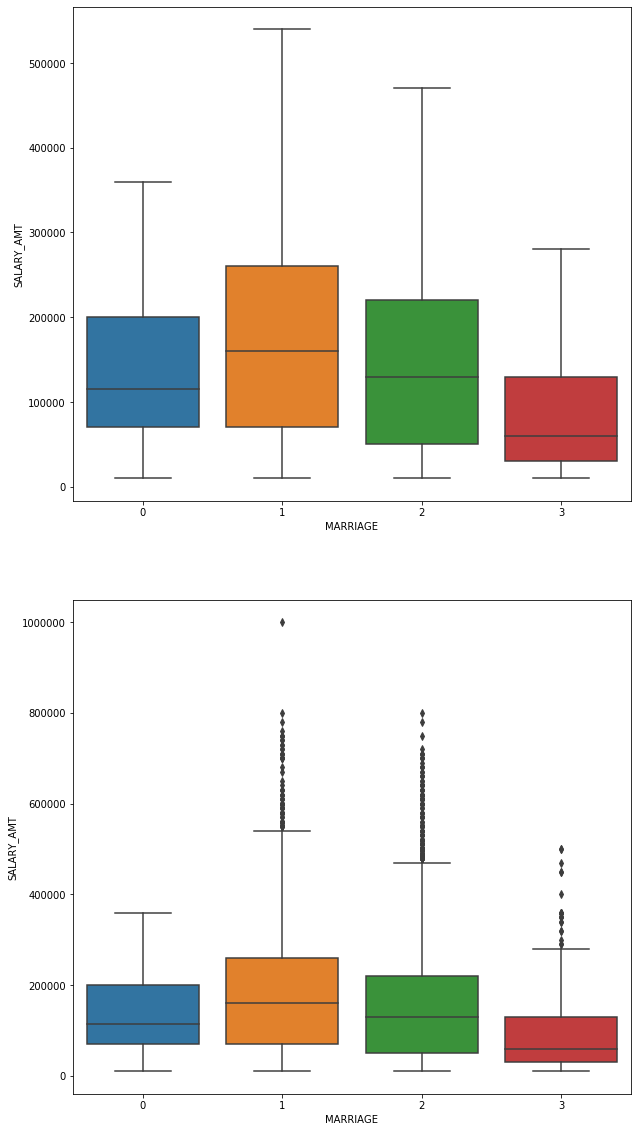

In [83]:
plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'MARRIAGE', y = 'SALARY_AMT', data = investpeople_df, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'MARRIAGE', y = 'SALARY_AMT', data = investpeople_df)


# #  CREACIÓN DEL CONJUNTO DE DATOS DE PRUEBA Y ENTRENAMIENTO Y REALIZAR UNA LIMPIEZA DE DATOS

In [ ]:
investpeople_df

In [85]:
X_cat = investpeople_df[['SEX', 'EDUCATION', 'MARRIAGE']]
X_cat

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


In [86]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [87]:
X_cat.shape

(30000, 13)

In [88]:
X_cat = pd.DataFrame(X_cat)

In [89]:
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [101]:
# Notemos que hemos eliminado la variable objetivo 'default.invesment.next.month'
X_numerical = investpeople_df[['SALARY_AMT', 'AGE', 'INVEST_0', 'INVEST_2', 'INVEST_3', 'INVEST_4', 'INVEST_5', 
                'NO_INVEST_AMT1','NO_INVEST_AMT2', 'NO_INVEST_AMT3', 'NO_INVEST_AMT4', 'NO_INVEST_AMT5', 'NO_INVEST_AMT6',
                'INVEST_AMT1', 'INVEST_AMT2', 'INVEST_AMT3', 'INVEST_AMT4', 'INVEST_AMT5', 'INVEST_AMT6']]
X_numerical

,SALARY_AMT,AGE,INVEST_0,INVEST_2,INVEST_3,INVEST_4,INVEST_5,NO_INVEST_AMT1,NO_INVEST_AMT2,NO_INVEST_AMT3,NO_INVEST_AMT4,NO_INVEST_AMT5,NO_INVEST_AMT6,INVEST_AMT1,INVEST_AMT2,INVEST_AMT3,INVEST_AMT4,INVEST_AMT5,INVEST_AMT6
0,20000.0,24,2,2,-1,-1,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,-1,2,0,0,0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57,-1,0,-1,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,43,-1,-1,-1,-1,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,37,4,3,2,-1,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,41,1,-1,0,0,0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [102]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,NO_INVEST_AMT3,NO_INVEST_AMT4,NO_INVEST_AMT5,NO_INVEST_AMT6,INVEST_AMT1,INVEST_AMT2,INVEST_AMT3,INVEST_AMT4,INVEST_AMT5,INVEST_AMT6
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [103]:
# 0 SI EL CLIENTE NO INVIERTE EL MES SIGUIENTE 
#1 SI EL CLLIENTE INVIERTE AL MES SIGUIENTE
y = investpeople_df['default.invesment.next.month']
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.invesment.next.month, Length: 30000, dtype: int64

Ventajas y desventajas del algoritmo

Ejemplo:

# ENTRENAR Y EVALUAR UN CLASIFICADOR XGBOOST

In [223]:
# 75% para entrenar el modelo y el 25% para testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [116]:
X_train.shape

(22500, 32)

In [117]:
X_test.shape

(7500, 32)

In [118]:
!pip install xgboost

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [119]:
# Entrenar un modelo de regresión con XGBoost 

import xgboost as xgb


model = xgb.XGBClassifier(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, objective='reg:squarederror',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

In [120]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)


In [121]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [122]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 82.18666666666667 %


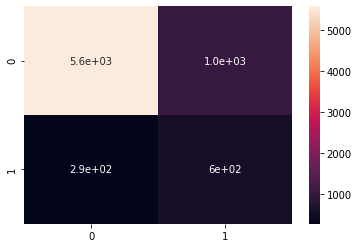

In [123]:
# Eficacia en el conjunto de test
# 56000 observaciones correctamente predichas de personas que invierten
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5852
           1       0.68      0.36      0.47      1648

    accuracy                           0.82      7500
   macro avg       0.76      0.66      0.68      7500
weighted avg       0.81      0.82      0.80      7500



# OPTIMIZAR LOS HIPERPARÁMETROS de XGBOOST REALIZANDO UN GRID SEARCH

In [128]:
param_grid = {
        'gamma': [0.5, 1, 5],   # parámetro de regularización
        'subsample': [0.6, 0.8, 1.0], # % de filas que usamos para construir cada árbol
        'colsample_bytree': [0.6, 0.8, 1.0], # % de columnas usadas por cada árbol
        'max_depth': [3, 4, 5] # profundidad de cada árbol
        }

In [130]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb_model, param_grid, refit = True, verbose = 4)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[03:05:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.818, total=   1.9s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[03:05:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.814, total=   1.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[03:05:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.809, total=   1.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[03:05:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.817, total=   1.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[03:05:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.816, total=   1.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8 .....
[03:05:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8, score=0.818, total=   1.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8 .....
[

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 18.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monoton...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, use_label_encoder=True,
                                     validate_parameters=N

In [135]:
y_predict_optim = grid.predict(X_test)

In [136]:
y_predict_optim

array([0, 0, 0, ..., 0, 0, 0])

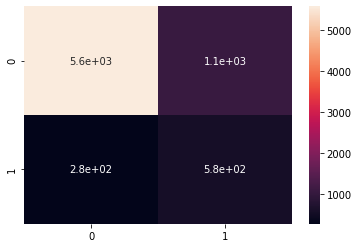

In [137]:
# Eficacia en el conjunto de test
cm = confusion_matrix(y_predict_optim, y_test)
sns.heatmap(cm, annot=True)

In [134]:
print(classification_report(y_test, y_predict_optim))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5852
           1       0.68      0.35      0.46      1648

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500



In [139]:
X_train.shape

(22500, 32)

# ENTRENAR XG-BOOST CON SAGEMAKER

In [143]:
# Convertir la matriz en un data frame de manera que la variable de destino se establezca como la primera columna y seguida de las columnas de características
# Esto se debe a que el algoritmo incorporado de Sagemaker espera los datos en este formato.

train_data = pd.DataFrame({'Target': y_train})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [145]:
train_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
3102,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.247585,0.345215,0.083102,0.260979,0.057238,0.059373,0.000000,0.000000,0.000000,0.000000
17221,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.125182,0.226382,0.135473,0.304512,0.002976,0.001556,0.002947,0.003221,0.005275,0.003972
14360,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.193369,0.283480,0.214176,0.368749,0.022895,0.000000,0.005580,0.009662,0.018756,0.009458
16707,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.123380,0.223809,0.116855,0.289740,0.002722,0.001544,0.002916,0.002415,0.003517,0.002837
21832,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.122282,0.222542,0.145328,0.312225,0.003434,0.001425,0.003348,0.003865,0.005861,0.004729


In [149]:
val_data = pd.DataFrame({'Target':y_test})
for i in range(X_test.shape[1]):
    val_data[i] = X_test[:,i]

In [150]:
val_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
2309,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.117245,0.214205,0.138753,0.307601,0.002293,0.001214,0.002292,0.003425,0.007137,0.005958
6332,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.140258,0.254438,0.175471,0.329736,0.013394,0.002137,0.003906,0.005636,0.007737,0.006620
19945,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.142014,0.244817,0.155662,0.302730,0.004579,0.005951,0.003401,0.003232,0.004891,0.003804
9240,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.087240,0.161900,0.083028,0.263653,0.000000,0.000968,0.002088,0.003865,0.008159,0.003026
23796,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.286241,0.504836,0.441211,0.493903,0.016557,0.009417,0.015178,0.019415,0.021898,0.017998


In [165]:
val_data.shape

(7500, 33)

In [166]:
# Guardamos train_data y validation_data como archivos csv.

train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [167]:
# Boto3 es el kit de desarrollo de software (SDK) de Amazon Web Services (AWS) para Python
# Boto3 permite al desarrollador de Python escribir software que hace uso de servicios como Amazon S3 y Amazon EC2

import sagemaker
import boto3

# Crear una sesión de sagemaker
sagemaker_session = sagemaker.Session()

# S3 Bucket y prefijo que queremos usar
# default_bucket: crea un bucket de Amazon S3 que se utilizará en esta sesión
bucket = 'sagemaker-practical-invest'
prefix = 'XGBoost-Regressor'
key = 'XGBoost-Regressor'
# Los roles dan acceso de aprendizaje y al alojamiento a nuestros datos
# Esto se especifica al abrir la instancia de sagemakers en "Crear un rol de IAM"
role = sagemaker.get_execution_role()

In [168]:
print(role)

arn:aws:iam::343441005079:role/service-role/AmazonSageMaker-ExecutionRole-20210318T005431


In [169]:
# leer los datos del archivo csv y luego cargar los datos en el depósito s3
import os
with open('train.csv','rb') as f:
    # El siguiente código carga los datos en el bucket de S3 para acceder más tarde al entrenamiento
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Imprimamos la ubicación de los datos de entrenamiento en s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('ubicación de datos de entrenamiento cargados: {}'.format(s3_train_data))

ubicación de datos de entrenamiento cargados: s3://sagemaker-practical-invest/XGBoost-Regressor/train/XGBoost-Regressor


In [170]:
# leer los datos del archivo csv y luego cargar los datos en el bucket s3

with open('validation.csv','rb') as f:
    # El siguiente código carga los datos en el bucket de S3 para acceder más tarde al entrenamiento
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)

# Imprimamos la ubicación de los datos de validación en s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

uploaded validation data location: s3://sagemaker-practical-invest/XGBoost-Regressor/validation/XGBoost-Regressor


In [171]:
# crea un placeholder de salida en el bucket S3 para almacenar la salida

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('los artefactos de entrenamiento se cargarán en: {}'.format(output_location))

los artefactos de entrenamiento se cargarán en: s3://sagemaker-practical-invest/XGBoost-Regressor/output


In [172]:
# Este código se usa para obtener el contenedor de entrenamiento de los algoritmos integrados de sagemaker
# todo lo que tenemos que hacer es especificar el nombre del algoritmo que queremos usar

# Obtengamos una referencia a la imagen del contenedor XGBoost
# Hay que tener en cuenta que todos los modelos de regresión se denominan estimadores
# No tenemos que especificar (hardcodear) la región, get_image_uri obtendrá el nombre de la región actual usando boto3.

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'xgboost','0.90-2') # Latest version of XGboost

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [182]:
# Especificar el tipo de instancia que nos gustaría usar para el entrenamiento.
# ruta de salida y sesión de sagemaker en el Estimador.
# También podemos especificar cuántas instancias nos gustaría utilizar para el entrenamiento

# Recordemos que XGBoost funciona combinando un conjunto de modelos débiles para generar resultados precisos / sólidos.
# Los modelos débiles son aleatorios para evitar el sobreajuste

# num_round: el número de rondas para ejecutar el entrenamiento.

# Alfa: Término de regularización L1 sobre pesos. Incrementar este valor hace que los modelos sean más conservadores.

# colsample_by_tree: fracción de características que se usarán para entrenar cada árbol.

# eta: Reducción del tamaño del paso que se utiliza en las actualizaciones para evitar el sobreajuste.
# Después de cada paso de boosting, el parámetro eta reduce los pesos de las funciones para hacer que el proceso de impulso sea más conservador.


Xgboost_regressor1 = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.m4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

# Podemos ajustar los hiperparámetros para mejorar el rendimiento del modelo

Xgboost_regressor1.set_hyperparameters(max_depth = 10,
                           objective = 'multi:softmax',
                           num_class = 2,
                           #colsample_bytree = 0.3,
                           #alpha = 10,
                           eta = 0.5,
                           num_round = 150
                           )



train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [183]:
# Creamos los canales "train", "validation" para entregar los datos al modelo
# Fuente: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')


data_channels = {'train': train_input,'validation': valid_input}


Xgboost_regressor1.fit(data_channels)

The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


2021-10-24 04:33:51 Starting - Starting the training job...
2021-10-24 04:34:14 Starting - Launching requested ML instancesProfilerReport-1635050031: InProgress
......
2021-10-24 04:35:15 Starting - Preparing the instances for training.........
2021-10-24 04:36:49 Downloading - Downloading input data
2021-10-24 04:36:49 Training - Downloading the training image......
2021-10-24 04:37:37 Training - Training image download completed. Training in progress..INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[04:37:41] 22500x32 matri

In [194]:
X_test.shape

(7500, 32)